In [2]:
import numpy as np

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
precomputed_graph = np.load('precomputed_graph.npy')

In [5]:
graph = nx.convert_matrix.from_numpy_array(precomputed_graph)
G = nx.minimum_spanning_tree(graph, weight='weight')

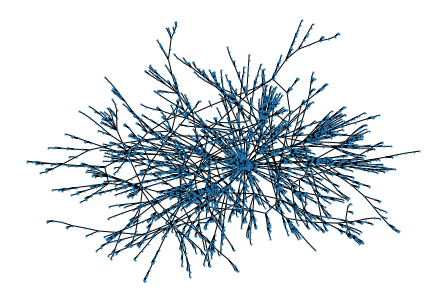

In [10]:
pos = nx.spring_layout(G, iterations=150)
nx.draw(G, pos, with_labels=False, node_size=1)
plt.show()

In [124]:
backup_graph = G

In [119]:
G = backup_graph

In [6]:
from sklearn.neighbors import NearestNeighbors

In [7]:
node_set = list(nx.nodes(G))

In [7]:
len(node_set)

3494

In [8]:
ordered_nodes = {}
inverse_index_nodes = {}
node_set = list(nx.nodes(G))
length_new_set = 0
length_old_set = len(node_set)
count = 0
while len(node_set) > 1 and length_new_set != length_old_set:
# get degree of neighbor nodes
    degree_of_nodes = G.degree()
    order_of_nodes = []
    degree_one = []
    print('iteration {}'.format(count))
    count += 1
    for key, value in dict(degree_of_nodes).items():
    #     print('{}::{}'.format(key, value))
        if value == 1:
            degree_one.append((key, value))

    dict_conflict_nodes = {}
    for key, value in degree_one:
    #     print()
    #     print('{}::{}'.format(key, value))

    #     print(G.edges(key))
    #     print(list(G.edges(key))[0][1])
        list_nodes = []
        next_node = True
        search_key = key
#         print('key {}'.format(key))
        nodes_visited = []
        while next_node:
            if search_key in list_nodes:
                next_node = False
                if list(G.edges(key))[0][1] in dict_conflict_nodes:
                    dict_conflict_nodes[list(G.edges(key))[0][1]].append(list_nodes)
                    for node_list in list_nodes:
                        if node_list in inverse_index_nodes:
                            inverse_index_nodes[node_list].append(list(G.edges(key))[0][1])
                        else:
                            inverse_index_nodes[node_list] = [list(G.edges(key))[0][1]]
                else:
                    dict_conflict_nodes[list(G.edges(key))[0][1]] = [list_nodes]
                    for node_list in list_nodes:
                        if node_list in inverse_index_nodes:
                            inverse_index_nodes[node_list].append(list(G.edges(key))[0][1])
                        else:
                            inverse_index_nodes[node_list] = [list(G.edges(key))[0][1]]
                break
            if search_key != key:
                list_nodes.append(search_key)
            print(list(G.edges(search_key)))
            if G.degree(list(G.edges(search_key))[0][1]) == 2:
                search_key = list(G.edges(search_key))[0][1]
            else:
                next_node = False
                if list(G.edges(key))[0][1] in dict_conflict_nodes:
                    dict_conflict_nodes[list(G.edges(key))[0][1]].append(list_nodes)
                    for node_list in list_nodes:
                        if node_list in inverse_index_nodes:
                            inverse_index_nodes[node_list].append(list(G.edges(key))[0][1])
                        else:
                            inverse_index_nodes[node_list] = [list(G.edges(key))[0][1]]
                            
                else:
                    dict_conflict_nodes[list(G.edges(key))[0][1]] = [list_nodes]
                    for node_list in list_nodes:
                        if node_list in inverse_index_nodes:
                            inverse_index_nodes[node_list].append(list(G.edges(key))[0][1])
                        else:
                            inverse_index_nodes[node_list] = [list(G.edges(key))[0][1]]
    #     print('Key {} Edge {} Degree {}'.format(key,G.edges(key), G.degree(list(G.edges(key))[0][1]) ))
    # print(dict_conflict_nodes)
    length_old_set = len(list(nx.nodes(G)))
    for key, value in dict_conflict_nodes.items():
        nodes_list = [item for sublist in value for item in sublist]
        if len(nodes_list) == 0:
            continue
    #     nodes_list.append(key)
        matrix_minhash = precomputed_graph[nodes_list, :]
        nbrs = NearestNeighbors(n_neighbors=len(nodes_list)).fit(matrix_minhash)
    #     print()
        distances, indices = nbrs.kneighbors([list(precomputed_graph[key, :])])
        ordered_nodes[key] = np.array(nodes_list)[indices[0]]
        for node in ordered_nodes[key]:
            try:
                G.remove_node(node)
            except:
                print('Node not in graph : {}'.format(node))
    node_set = list(nx.nodes(G))
    length_new_set = len(list(nx.nodes(G)))
    
    

iteration 0
[(3, 2203)]
[(4, 1231)]
[(6, 716)]
[(13, 475)]
[(18, 953)]
[(28, 139)]
[(139, 2041), (139, 28)]
[(31, 74)]
[(37, 20)]
[(39, 2305)]
[(2305, 39), (2305, 690)]
[(42, 299)]
[(46, 2438)]
[(47, 968)]
[(49, 76)]
[(53, 3163)]
[(57, 274)]
[(59, 2281)]
[(62, 328)]
[(77, 2324)]
[(78, 2516)]
[(2516, 78), (2516, 1403)]
[(80, 543)]
[(81, 1096)]
[(1096, 1618), (1096, 81)]
[(82, 1567)]
[(1567, 1642), (1567, 82)]
[(83, 2352)]
[(2352, 961), (2352, 83)]
[(90, 120)]
[(91, 642)]
[(642, 470), (642, 91)]
[(92, 43)]
[(96, 681)]
[(97, 1948)]
[(1948, 74), (1948, 97)]
[(99, 916)]
[(100, 191)]
[(105, 513)]
[(109, 902)]
[(110, 698)]
[(698, 1646), (698, 110)]
[(116, 722)]
[(121, 954)]
[(127, 89)]
[(131, 86)]
[(135, 1130)]
[(138, 1158)]
[(141, 2132)]
[(144, 740)]
[(146, 944)]
[(149, 2200)]
[(154, 1561)]
[(1561, 2334), (1561, 154)]
[(157, 3420)]
[(161, 2047)]
[(2047, 1756), (2047, 161)]
[(169, 519)]
[(176, 2404)]
[(2404, 1812), (2404, 176)]
[(1812, 851), (1812, 2404)]
[(181, 2924)]
[(184, 1627)]
[(192, 14

[(1551, 1137), (1551, 3026)]
[(3027, 1597)]
[(3031, 85)]
[(3032, 2189)]
[(2189, 1815), (2189, 3032)]
[(1815, 1718), (1815, 2189)]
[(3034, 794)]
[(3035, 2545)]
[(2545, 1397), (2545, 3035)]
[(3036, 1901)]
[(3037, 1515)]
[(3038, 1083)]
[(3041, 3021)]
[(3021, 482), (3021, 3041)]
[(3042, 638)]
[(3043, 175)]
[(3044, 30)]
[(3045, 3251)]
[(3047, 3135)]
[(3135, 1059), (3135, 3047)]
[(3048, 170)]
[(170, 941), (170, 3048)]
[(3051, 728)]
[(3052, 2559)]
[(3053, 835)]
[(3054, 373)]
[(3055, 632)]
[(3057, 754)]
[(3059, 3406)]
[(3406, 2098), (3406, 3059)]
[(3060, 2276)]
[(3061, 2501)]
[(2501, 3061), (2501, 41)]
[(3062, 2606)]
[(3063, 1313)]
[(1313, 1543), (1313, 3063)]
[(3064, 122)]
[(3065, 260)]
[(260, 2433), (260, 3065)]
[(2433, 150), (2433, 260)]
[(3068, 442)]
[(3070, 362)]
[(362, 2272), (362, 3070)]
[(3071, 781)]
[(3072, 404)]
[(3074, 2751)]
[(2751, 1659), (2751, 3074)]
[(3076, 14)]
[(3077, 1522)]
[(3078, 2652)]
[(3079, 753)]
[(753, 2889), (753, 3079)]
[(3081, 2867)]
[(3082, 383)]
[(383, 434), (383

iteration 1
[(3, 2203)]
[(4, 1231)]
[(6, 716)]
[(13, 475)]
[(18, 953)]
[(21, 840)]
[(840, 21), (840, 725)]
[(31, 74)]
[(37, 20)]
[(20, 1881), (20, 37)]
[(1881, 785), (1881, 20)]
[(785, 638), (785, 1881)]
[(41, 423)]
[(42, 299)]
[(46, 2438)]
[(47, 968)]
[(49, 76)]
[(53, 3163)]
[(57, 274)]
[(59, 2281)]
[(62, 328)]
[(66, 2341)]
[(2341, 66), (2341, 690)]
[(75, 1401)]
[(1401, 702), (1401, 75)]
[(77, 2324)]
[(80, 543)]
[(90, 120)]
[(92, 43)]
[(96, 681)]
[(99, 916)]
[(100, 191)]
[(105, 513)]
[(109, 902)]
[(116, 722)]
[(121, 954)]
[(127, 89)]
[(131, 86)]
[(133, 525)]
[(135, 1130)]
[(138, 1158)]
[(141, 2132)]
[(144, 740)]
[(146, 944)]
[(149, 2200)]
[(156, 1379)]
[(157, 3420)]
[(169, 519)]
[(181, 2924)]
[(184, 1627)]
[(1627, 119), (1627, 184)]
[(192, 1423)]
[(193, 3417)]
[(197, 2003)]
[(203, 1445)]
[(206, 3013)]
[(210, 1179)]
[(213, 3420)]
[(217, 717)]
[(220, 2408)]
[(223, 856)]
[(231, 2334)]
[(232, 1618)]
[(237, 32)]
[(240, 1254)]
[(246, 599)]
[(249, 725)]
[(250, 525)]
[(253, 274)]
[(255, 524)]

iteration 2
[(3, 2203)]
[(4, 1231)]
[(6, 716)]
[(13, 475)]
[(18, 953)]
[(31, 74)]
[(41, 423)]
[(42, 299)]
[(46, 2438)]
[(47, 968)]
[(49, 76)]
[(53, 3163)]
[(57, 274)]
[(59, 2281)]
[(62, 328)]
[(77, 2324)]
[(80, 543)]
[(90, 120)]
[(92, 43)]
[(96, 681)]
[(99, 916)]
[(100, 191)]
[(105, 513)]
[(109, 902)]
[(116, 722)]
[(121, 954)]
[(127, 89)]
[(131, 86)]
[(133, 525)]
[(135, 1130)]
[(138, 1158)]
[(141, 2132)]
[(144, 740)]
[(146, 944)]
[(149, 2200)]
[(156, 1379)]
[(157, 3420)]
[(169, 519)]
[(181, 2924)]
[(192, 1423)]
[(193, 3417)]
[(197, 2003)]
[(203, 1445)]
[(206, 3013)]
[(210, 1179)]
[(213, 3420)]
[(217, 717)]
[(220, 2408)]
[(223, 856)]
[(231, 2334)]
[(232, 1618)]
[(237, 32)]
[(240, 1254)]
[(246, 599)]
[(249, 725)]
[(250, 525)]
[(253, 274)]
[(255, 524)]
[(256, 1642)]
[(257, 489)]
[(263, 989)]
[(269, 150)]
[(272, 142)]
[(278, 52)]
[(280, 1932)]
[(283, 1584)]
[(289, 148)]
[(295, 1586)]
[(296, 2)]
[(297, 2767)]
[(302, 1177)]
[(305, 2242)]
[(310, 464)]
[(314, 900)]
[(318, 191)]
[(326, 207)]
[(

[(917, 3140)]
[(921, 448)]
[(922, 207)]
[(926, 2324)]
[(927, 2322)]
[(928, 2131)]
[(929, 84)]
[(930, 1522)]
[(934, 728)]
[(943, 2428)]
[(949, 319)]
[(952, 264)]
[(956, 95)]
[(958, 2334)]
[(959, 1417)]
[(963, 381)]
[(966, 3287)]
[(970, 2281)]
[(972, 1902)]
[(973, 2207)]
[(975, 989)]
[(976, 400)]
[(978, 327)]
[(979, 2417)]
[(981, 1376)]
[(982, 323)]
[(990, 1419)]
[(994, 875)]
[(997, 1311)]
[(1001, 2646)]
[(1002, 150)]
[(1008, 1212)]
[(1009, 1376)]
[(1011, 2242)]
[(1014, 2428)]
[(1016, 150)]
[(1018, 526)]
[(1020, 521)]
[(1028, 951)]
[(1030, 150)]
[(1031, 76)]
[(1036, 371)]
[(1038, 611)]
[(1039, 89)]
[(1042, 1179)]
[(1043, 588)]
[(1046, 971)]
[(1049, 2611)]
[(1050, 277)]
[(1051, 1423)]
[(1053, 306)]
[(1064, 265)]
[(1065, 1515)]
[(1066, 728)]
[(1070, 813)]
[(1072, 2097)]
[(1074, 1410)]
[(1076, 2030)]
[(1084, 16)]
[(1087, 3099)]
[(1089, 431)]
[(1101, 478)]
[(1105, 910)]
[(1114, 1121)]
[(1119, 860)]
[(1120, 1417)]
[(1125, 159)]
[(1126, 3287)]
[(1128, 130)]
[(1138, 1158)]
[(1140, 1593)]
[(1141

[(2116, 1196)]
[(2119, 1130)]
[(2120, 274)]
[(2121, 1920)]
[(2122, 306)]
[(2123, 1710)]
[(2126, 800)]
[(2128, 327)]
[(2129, 1893)]
[(2130, 708)]
[(2133, 1808)]
[(2134, 238)]
[(2135, 19)]
[(2136, 58)]
[(2138, 2939)]
[(2140, 1130)]
[(2141, 1969)]
[(2142, 44)]
[(2146, 1593)]
[(2152, 1635)]
[(2153, 2408)]
[(2155, 214)]
[(2156, 1113)]
[(2157, 1409)]
[(2162, 960)]
[(2164, 1747)]
[(2175, 174)]
[(2177, 191)]
[(2179, 214)]
[(2180, 2518)]
[(2192, 1766)]
[(2194, 2131)]
[(2195, 1196)]
[(2199, 1476)]
[(2210, 924)]
[(2211, 1130)]
[(2214, 2319)]
[(2215, 118)]
[(2216, 563)]
[(2217, 2312)]
[(2219, 819)]
[(2222, 1354)]
[(2228, 177)]
[(2229, 1354)]
[(2231, 1858)]
[(2232, 119)]
[(2234, 2426)]
[(2237, 372)]
[(2240, 2170)]
[(2245, 1875)]
[(2246, 411)]
[(2247, 2139)]
[(2248, 461)]
[(2252, 150)]
[(2256, 427)]
[(2258, 1347)]
[(2259, 961)]
[(2260, 1121)]
[(2263, 531)]
[(2266, 27)]
[(2267, 32)]
[(2268, 76)]
[(2274, 490)]
[(2278, 523)]
[(2279, 2236)]
[(2280, 2271)]
[(2282, 3058)]
[(2284, 2819)]
[(2285, 813)]
[(22

[(3120, 2448)]
[(3125, 523)]
[(3126, 159)]
[(3130, 1445)]
[(3131, 937)]
[(3133, 670)]
[(3134, 1111)]
[(3136, 741)]
[(3141, 1718)]
[(3143, 1646)]
[(3146, 104)]
[(3147, 951)]
[(3152, 359)]
[(3153, 2276)]
[(3154, 1175)]
[(3157, 205)]
[(3161, 632)]
[(3162, 1735)]
[(3168, 363)]
[(3170, 238)]
[(3171, 466)]
[(3172, 10)]
[(3173, 1635)]
[(3174, 3403)]
[(3175, 2819)]
[(3176, 150)]
[(3178, 830)]
[(3179, 3213)]
[(3180, 824)]
[(3182, 466)]
[(3184, 94)]
[(3186, 1796)]
[(3187, 935)]
[(3188, 819)]
[(3190, 2417)]
[(3191, 1295)]
[(3192, 740)]
[(3194, 478)]
[(3195, 548)]
[(3196, 2867)]
[(3199, 506)]
[(3201, 2521)]
[(3207, 2874)]
[(3212, 3470)]
[(3214, 2131)]
[(3215, 34)]
[(3217, 621)]
[(3221, 1351)]
[(3222, 3030)]
[(3223, 1598)]
[(3227, 1139)]
[(3228, 3361)]
[(3229, 3216)]
[(3232, 470)]
[(3234, 2324)]
[(3235, 344)]
[(3237, 2646)]
[(3238, 2132)]
[(3240, 129)]
[(3245, 195)]
[(3246, 781)]
[(3249, 1117)]
[(3252, 1106)]
[(3258, 866)]
[(3263, 3397)]
[(3264, 2149)]
[(3268, 313)]
[(3271, 2867)]
[(3277, 344)]
[(3

In [109]:


#     print(nodes_list)
    

In [9]:
len(ordered_nodes)

681

In [10]:
inverse_index_nodes

{139: [139],
 2305: [2305],
 2516: [2516],
 1096: [1096],
 1567: [1567],
 2352: [2352],
 642: [642],
 1948: [1948],
 698: [698],
 1561: [1561],
 2047: [2047],
 2404: [2404],
 1812: [2404],
 155: [155],
 2860: [2860],
 1882: [1882],
 1250: [1250],
 276: [276],
 2095: [2095],
 2291: [2291],
 3462: [3462],
 2318: [2318],
 723: [723],
 601: [601],
 1198: [1198],
 1088: [1198],
 1888: [1888],
 1232: [1888],
 1432: [1432],
 171: [171],
 2833: [2833],
 1287: [1287],
 1004: [1004],
 2786: [2786],
 1580: [1580],
 1937: [1937],
 342: [342],
 618: [618],
 703: [703],
 2114: [2114],
 2344: [2344],
 1134: [1134],
 684: [684],
 3040: [3040],
 3156: [3156],
 358: [358],
 1468: [1468],
 3423: [3423],
 3208: [3208],
 2026: [2026],
 2205: [2205],
 115: [115],
 977: [977],
 486: [486],
 355: [355],
 178: [178],
 2262: [178],
 799: [799],
 1774: [1774],
 936: [936],
 516: [936],
 1280: [1280],
 925: [1280],
 1149: [1149],
 503: [1149],
 3354: [3354],
 2462: [2462],
 3085: [3085],
 1524: [1524],
 646: [152

In [11]:
ordered_nodes

{139: array([139]),
 2305: array([2305]),
 2516: array([2516]),
 1096: array([1096]),
 1567: array([1567]),
 2352: array([2352]),
 642: array([642]),
 1948: array([1948]),
 698: array([698]),
 1561: array([1561]),
 2047: array([2047]),
 2404: array([2404, 1812]),
 155: array([155]),
 2860: array([2860]),
 1882: array([1882]),
 1250: array([1250]),
 276: array([276]),
 2095: array([2095]),
 2291: array([2291]),
 3462: array([3462]),
 2318: array([2318]),
 723: array([723]),
 601: array([601]),
 1198: array([1198, 1088]),
 1888: array([1888, 1232]),
 1432: array([1432]),
 171: array([171]),
 2833: array([2833]),
 1287: array([1287]),
 1004: array([1004]),
 2786: array([2786]),
 1580: array([1580]),
 1937: array([1937]),
 342: array([342]),
 618: array([618]),
 703: array([703]),
 2114: array([2114]),
 2344: array([2344]),
 1134: array([1134]),
 684: array([684]),
 3040: array([3040]),
 3156: array([3156]),
 358: array([358]),
 1468: array([1468]),
 3423: array([3423]),
 3208: array([3208

In [143]:
ordered_list = []
index = list(ordered_nodes.keys())[0]
end_reached = False
while not end_reached:
    ordered_list.extend(ordered_nodes[index])
    if index in inverse_index_nodes:
        if index == inverse_index_nodes[index][0]:
            print('Dead end {} {}'.format(index, inverse_index_nodes[index]))
            end_reached=True
        else:
            index = inverse_index_nodes[index][0]
    else:
        end_reached=True
    

Dead end 1117 [1117]
